In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Fake News Detection Using Machine Learning Project

Goal : 

To predict, classify, detect fake or fraud news based on the data set provided.

I have done this project with the help of this web : https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/


In [73]:
data = pd.read_csv("D:\.vscode\kodingan\Fake News Detection Project\dataset\\news.csv")

In [74]:
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [75]:
df = data.copy()
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


## Data Prep
since the data already cleaned we can go straight to analysing the data.

- **unnamed** = i think it an id of the news(?)
- **title** = title of the news
- **text** = the content insideof the news
- **label** = label to detect whether the news is fake or not


In [76]:
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


get the label to detect whether the news is fake or not

In [77]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

splitting the data set into train and test

In [78]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7. Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

transform the vectorizer with the training data and then transform the test data with the same vectorizer.

In [79]:
# initialize a TfidfVectorizer
Tfidf_Vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.7)

# fir and transform train set, transfrom test set
tfidf_train = Tfidf_Vectorizer.fit_transform(x_train)
tfidf_test = Tfidf_Vectorizer.transform(x_test)

In [80]:
#initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [81]:
confusion_matrix(y_test,y_pred, labels = ['FAKE','REAL'])

array([[590,  48],
       [ 44, 585]], dtype=int64)

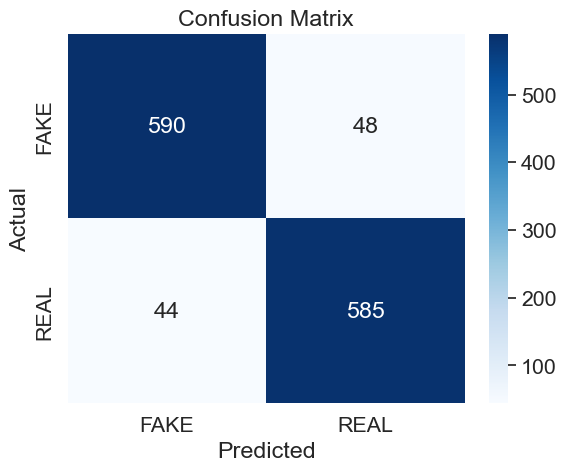

In [85]:
labels = ['FAKE', 'REAL']

# Create seaborn heatmap
sns.set(font_scale=1.4) # Adjust font size if necessary
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show plot
plt.show()

# Conclusion

dengan hasil model yang mempunyai Accuracy: 92.74%

- **True Positives (TP)**: Ada 590 prediksi yang benar-benar FAKE dan diklasifikasikan sebagai FAKE.

- **False Positives (FP)**: Ada 48 prediksi yang sebenarnya REAL tetapi salah diklasifikasikan sebagai FAKE.

- **False Negatives (FN)**: Ada 44 prediksi yang sebenarnya FAKE tetapi salah diklasifikasikan sebagai REAL.

- **True Negatives (TN)**: Ada 585 prediksi yang benar-benar REAL dan diklasifikasikan sebagai REAL.

bisa di katakan bahwa model ini sangat bagus.
